In [1]:
# Import Data Manipulation libraries
import pandas as pd
import numpy as np 
import statistics 
import os

#Import Data Visualization libraries 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns

#Import counting libraries 
from itertools import combinations 
from collections import Counter 

Merge all 12 files into one csv file 

In [2]:
#Confirm file is accessible 
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df.head()

#List comprehension to load all files into a list

files = [file for file in os.listdir('./Sales_Data')]

files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
# Create an empty dataframe to hold all 12 months of data 
total_files = pd.DataFrame()

#For loop to read through monthly files and merge/concat together into one csv file 
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    total_files = pd.concat([total_files, df])
total_files

total_files.to_csv("./Sales_Data/all_months.csv", index=False)



In [6]:
# Read in the new combined data 

final_df = pd.read_csv("./Sales_Data/all_months.csv")

final_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Convert columns into appropriate data types for analysis

In [7]:
final_df[['Quantity Ordered', 'Price Each']] = final_df[['Quantity Ordered', 'Price Each']].apply(pd.to_numeric, errors='coerce')
final_df['Order Date'] = pd.to_datetime(final_df['Order Date'], errors='coerce')
final_df.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [8]:
final_df = final_df.dropna(how='any')
                           
cleaned_df = final_df.reset_index(drop=True)

cleaned_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


#### Pull month out of Order Date

In [9]:
cleaned_df['Month'] = pd.DatetimeIndex(cleaned_df['Order Date']).month
cleaned_df['Month'] = cleaned_df['Month'].astype(int)

#Import calendar to convert numerical value to string 
import calendar

cleaned_df['Month'] = cleaned_df['Month'].apply(lambda x: calendar.month_abbr[x])
cleaned_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr


#### Add Total Column: Quantity * Price Each


In [10]:
cleaned_df['Total Spent'] = cleaned_df['Quantity Ordered'] * cleaned_df['Price Each']
cleaned_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Spent
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99


#### Add City and State Column

In [11]:
#Function to grab state 

def get_state(address):
    return address.split(',')[2].split(' ')[1]

#Function to grab city  
def get_city(address):
    return address.split(',')[1]

cleaned_df['City'] = cleaned_df['Purchase Address'].apply(lambda x: get_city(x) + ',' + get_state(x))

cleaned_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Spent,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,"Dallas,TX"
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,"Boston,MA"
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,"Los Angeles,CA"
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,"Los Angeles,CA"
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,"Los Angeles,CA"


### Question 1: What was the best month for sales? How much was earned in that month? 

In [12]:
total_sales =  cleaned_df.groupby('Month').sum()

total_sales.reset_index(inplace= True)

total_sales


#ou can use categorical data to enable proper sorting with pd.Categorical:

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
total_sales['Month'] = pd.Categorical(total_sales['Month'], categories=months, ordered=True)
total_sales.sort_values('Month')

,Month,Quantity Ordered,Price Each,Total Spent
4,Jan,10903.0,1.811768e+06,1.822257e+06
3,Feb,13449.0,2.188885e+06,2.202022e+06
7,Mar,17005.0,2.791208e+06,2.807100e+06
0,Apr,20558.0,3.367671e+06,3.390670e+06
8,May,18667.0,3.135125e+06,3.152607e+06
6,Jun,15253.0,2.562026e+06,2.577802e+06
5,Jul,16072.0,2.632540e+06,2.647776e+06
1,Aug,13448.0,2.230345e+06,2.244468e+06
11,Sep,13109.0,2.084992e+06,2.097560e+06
10,Oct,22703.0,3.715555e+06,3.736727e+06


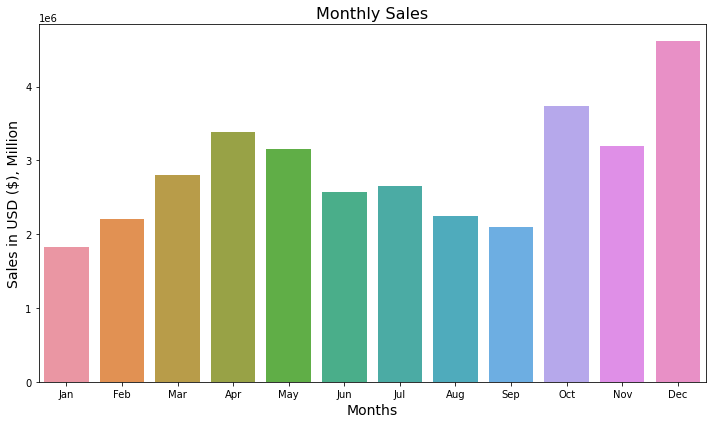

In [13]:
plt.figure(figsize=(10,6))

sns.barplot(x= 'Month', y='Total Spent', data=total_sales)
plt.ylabel('Sales in USD ($), Million', fontsize=14)
plt.xlabel('Months', fontsize=14)
plt.title('Monthly Sales', fontsize=16)
plt.tight_layout()

plt.savefig('./Images/monthly_sales.jpg')

### Question 2:  What city had the highest number of sales?

In [14]:
sales_city = cleaned_df.groupby('City').sum()

sales_by_city = sales_city.sort_values('Total Spent', ascending=False)
sales_by_city.reset_index(inplace= True)
sales_by_city


,City,Quantity Ordered,Price Each,Total Spent
0,"San Francisco,CA",50239.0,8.211462e+06,8.262204e+06
1,"Los Angeles,CA",33289.0,5.421435e+06,5.452571e+06
2,"New York City,NY",27932.0,4.635371e+06,4.664317e+06
3,"Boston,MA",22528.0,3.637410e+06,3.661642e+06
4,"Atlanta,GA",16602.0,2.779908e+06,2.795499e+06
5,"Dallas,TX",16730.0,2.752628e+06,2.767975e+06
6,"Seattle,WA",16553.0,2.733296e+06,2.747755e+06
7,"Portland,OR",11303.0,1.860558e+06,1.870732e+06
8,"Austin,TX",11153.0,1.809874e+06,1.819582e+06
9,"Portland,ME",2750.0,4.471893e+05,4.497583e+05


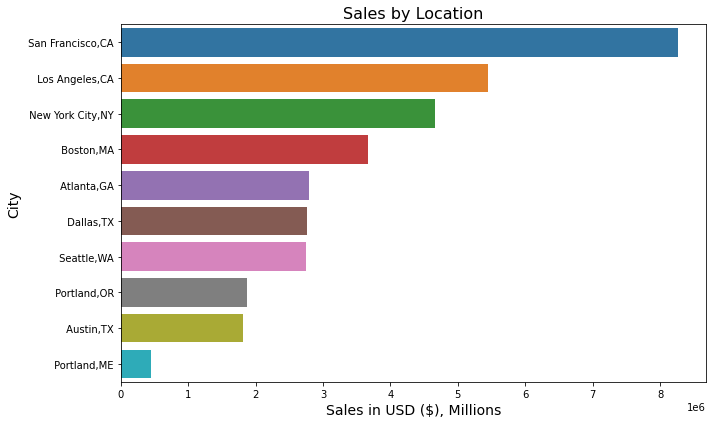

In [15]:
#Plot a horizontal chart 
plt.figure(figsize=(10,6))
sns.barplot(y ='City',x='Total Spent', data=sales_by_city)
plt.title('Sales by Location', fontsize =16)
plt.xlabel('Sales in USD ($), Millions', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.tight_layout()

plt.savefig('./Images/sales_by_city.jpg')

### What time should we display ads to maximize consumer purchasing behavior?

In [16]:
cleaned_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Spent,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,"Dallas,TX"
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,"Boston,MA"
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,"Los Angeles,CA"
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,"Los Angeles,CA"
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,"Los Angeles,CA"


In [17]:
#Pull the hour out of the datetime, Order Date 

cleaned_df['Hour'] = cleaned_df['Order Date'].dt.hour
cleaned_df['Minute'] = cleaned_df['Order Date'].dt.minute

cleaned_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Spent,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Apr,23.90,"Dallas,TX",8,46
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Apr,99.99,"Boston,MA",22,30
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,"Los Angeles,CA",14,38
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,"Los Angeles,CA",14,38
4,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Apr,11.99,"Los Angeles,CA",9,27


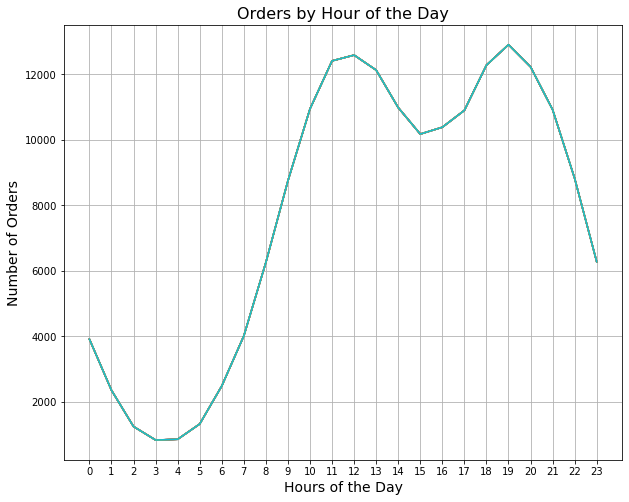

In [18]:
hours = [hour for hour, df in cleaned_df.groupby('Hour')]

plt.figure(figsize=(10,8))

plt.plot(hours,cleaned_df.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours of the Day', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.title('Orders by Hour of the Day', fontsize=16)

plt.savefig('./Images/orders_by_hour.jpg')
plt.show()

There are approximately 2 peaks at the data. They are 12 (12 PM) and 19 (7 PM). It makes sense since most people shopping during the day. From this data, we can suggest to our bussiness partner to advertise their product right before 12 PM and/or 7 PM. It could be 11.30 AM and/or 6.30 PM.

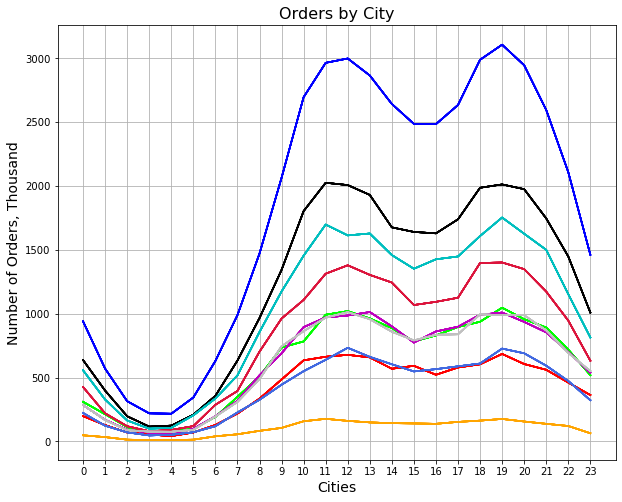

In [19]:
hours = [hour for hour, df in cleaned_df.groupby('Hour')]
plt.figure(figsize=(10,8))
#San Francisco 
sf = cleaned_df[cleaned_df['City'] == ' San Francisco,CA']

sf_data = sf.groupby('Hour').count()
plt.plot(hours, sf_data, color='b', label = 'San Francisco')
plt.xticks(hours)
plt.grid()

#Atlanta 
atl = cleaned_df[cleaned_df['City'] == ' Atlanta,GA']
atl_data = atl.groupby('Hour').count()
plt.plot(hours, atl_data, color='lime', label='Atlanta')
plt.xticks(hours)
plt.grid()

#Austin
atx =  cleaned_df[cleaned_df['City'] == ' Austin,TX']
atx_data = atx.groupby('Hour').count()
plt.plot(hours, atx_data, color='r', label='Austin')
plt.xticks(hours)
plt.grid()

#Boston 
bos =  cleaned_df[cleaned_df['City'] == ' Boston,MA']
bos_data = bos.groupby('Hour').count()
plt.plot(hours, bos_data, color='crimson', label='Boston')
plt.xticks(hours)
plt.grid()

#Dallas
dal =  cleaned_df[cleaned_df['City'] == ' Dallas,TX']
dal_data = dal.groupby('Hour').count()
plt.plot(hours, dal_data, color='m', label='Dallas')
plt.xticks(hours)
plt.grid()

#Los Angeles
los =  cleaned_df[cleaned_df['City'] == ' Los Angeles,CA']
los_data = los.groupby('Hour').count()
plt.plot(hours, los_data, color='k', label='Los Angeles')
plt.xticks(hours)
plt.grid()


#NY
nyc =  cleaned_df[cleaned_df['City'] == ' New York City,NY']
nyc_data = nyc.groupby('Hour').count()
plt.plot(hours, nyc_data, color='c', label='New York City')
plt.xticks(hours)
plt.grid()

#Portland, Maine

prtm =  cleaned_df[cleaned_df['City'] == ' Portland,ME']
prtm_data = prtm.groupby('Hour').count()
plt.plot(hours, prtm_data, color='orange', label='Portland, ME')
plt.xticks(hours)
plt.grid()


#Portland, Oregon
pdx =  cleaned_df[cleaned_df['City'] == ' Portland,OR']
pdx_data = pdx.groupby('Hour').count()
plt.plot(hours, pdx_data, color='royalblue', label='Portland, OR')
plt.xticks(hours)
plt.grid()

#Seattle 
sea =  cleaned_df[cleaned_df['City'] == ' Seattle,WA']
sea_data = sea.groupby('Hour').count()
plt.plot(hours, sea_data, color='silver', label='Seattle')
plt.xticks(hours)
plt.grid(True)

plt.title('Orders by City', fontsize= 16)
plt.xlabel('Cities', fontsize= 14)
plt.ylabel('Number of Orders, Thousand', fontsize= 14)

plt.show()



#West Coast:

LA, SF, Portland, Seattle

#Mid-West 

ATL, ATX, DAL 

#East Coast

Boston, NYC, and Portland , Maine 

In [ ]:
temp_city = cleaned_df.groupby('City')[['Hour']].count()

temp_city.reset_index(inplace=True)
temp_city

In [ ]:
# hours = [hour for hour, df in cleaned_df.groupby('Hour')]

# atl_temp = temp_city[temp_city['City'] == ' Atlanta,GA']
# atx_temp = temp_city[temp_city['City'] == ' Austin,TX']
# bos_temp = temp_city[temp_city['City'] == ' Boston,MA']
# dal_temp = temp_city[temp_city['City'] == ' Dallas,TX']
# los_temp = temp_city[temp_city['City'] == ' Los Angeles,CA']
# nye_temp = temp_city[temp_city['City'] == ' New York City,NY']
# pdx_temp = temp_city[temp_city['City'] == ' Portland,ME']
# por_temp = temp_city[temp_city['City'] == ' Portland,OR']
# sf_temp = temp_city[temp_city['City'] == ' San Francisco,CA']
# sea_temp = temp_city[temp_city['City'] == ' Seattle,WA']


### Which products are most often sold together? 

In [20]:
# #Upon inspection, the Order ID column indicates the transaction, so we can group the product by Order ID.

new_df = cleaned_df[cleaned_df['Order ID'].duplicated(keep = False)]
new_df.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Spent,City,Hour,Minute
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,"Los Angeles,CA",14,38
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,"Los Angeles,CA",14,38
17,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,"Los Angeles,CA",19,42
18,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,"Los Angeles,CA",19,42
29,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Apr,99.99,"Boston,MA",11,31
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Apr,99.99,"Boston,MA",11,31
31,176586,AAA Batteries (4-pack),2.0,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",Apr,5.98,"San Francisco,CA",17,0
32,176586,Google Phone,1.0,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",Apr,600.00,"San Francisco,CA",17,0
118,176672,Lightning Charging Cable,1.0,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",Apr,14.95,"New York City,NY",11,7
119,176672,USB-C Charging Cable,1.0,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",Apr,11.95,"New York City,NY",11,7


In [21]:
# Joining products with the same Order ID into the same line
new_df['Product_bought'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
new_df



<ipython-input-21-f5288ce996df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Product_bought'] = new_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Spent,City,Hour,Minute,Product_bought
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00,"Los Angeles,CA",14,38,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99,"Los Angeles,CA",14,38,"Google Phone,Wired Headphones"
17,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Apr,600.00,"Los Angeles,CA",19,42,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Apr,11.95,"Los Angeles,CA",19,42,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Apr,99.99,"Boston,MA",11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
185893,259303,AA Batteries (4-pack),1.0,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",Sep,3.84,"Atlanta,GA",20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
185904,259314,Wired Headphones,1.0,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",Sep,11.99,"Atlanta,GA",0,25,"Wired Headphones,AAA Batteries (4-pack)"
185905,259314,AAA Batteries (4-pack),2.0,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",Sep,5.98,"Atlanta,GA",0,25,"Wired Headphones,AAA Batteries (4-pack)"
185941,259350,Google Phone,1.0,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",Sep,600.00,"San Francisco,CA",13,49,"Google Phone,USB-C Charging Cable"


In [22]:
#Upon inspection, we do have an issue where the same order is listed twice because we did merge by groupby without dropping duplicates
new_df = new_df[['Order ID', 'Product_bought']].drop_duplicates()
new_df

,Order ID,Product_bought
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
185882,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
185884,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
185892,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
185904,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [25]:
#Referenced https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
count = Counter()

for row in new_df['Product_bought']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
print(count)

#Lets see top 10 common pairs 
count.most_common(10)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### What product sold the most? Why do you think it was that product?

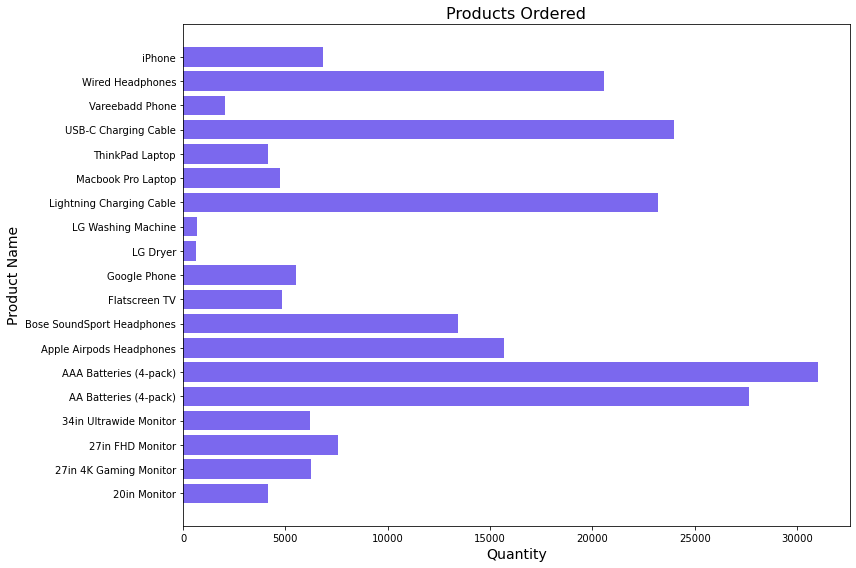

In [69]:
all_product = cleaned_df.groupby('Product')
quantity_ordered = all_product.sum()['Quantity Ordered']

products = [product for product, df in all_product]
plt.figure(figsize=(12,8))

plt.barh(products, quantity_ordered, color = 'mediumslateblue')
plt.title('Products Ordered', fontsize= 16)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.tight_layout()
plt.savefig('./Images/products_ordered.jpg')

<ipython-input-68-ab45e609dbf5>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(products, rotation=90, size=10)


<Figure size 1440x576 with 0 Axes>

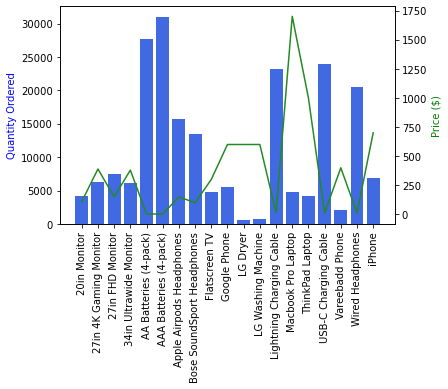

In [68]:
prices = cleaned_df.groupby('Product').mean()['Price Each']
plt.figure(figsize=(20,8))
fig, ax = plt.subplots()

ax1 = ax.twinx()
ax.bar(products,quantity_ordered, color='royalblue')
ax1.plot(products, prices, color='forestgreen')
plt.xlabel('Product Name', fontsize=14)
ax.set_ylabel('Quantity Ordered', color='blue')
ax1.set_ylabel('Price ($)', color='green')
ax.set_xticklabels(products, rotation=90, size=10)
plt.show()